### Importing Libraries

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import scipy
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure

### Importing Datasets

In [3]:
df=pd.read_pickle(os.path.join(r"C:\Users\aminj\Documents\DataSets\Weather Conditions & Climate Change\Data\weather-data.pkl"))

In [5]:
pleasantdf=pd.read_csv(os.path.join(r"C:\Users\aminj\Documents\DataSets\Weather Conditions & Climate Change\Data\Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv"))

### Data Manipulation

In [7]:
#dropping unrelated station data from main dataset
activedf=df.drop(columns=['GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max','ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean','TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max'])

In [9]:
activedf.head()

,id,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,DATE,MONTH
0,-1.731975,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,...,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237,19600101,1
1,-1.731824,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,-0.582946,...,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141,19600102,1
2,-1.731673,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,-0.257010,...,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078,19600103,1
3,-1.731523,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,-0.555784,...,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511,19600104,1
4,-1.731372,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,-1.003946,...,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186,19600105,1


In [11]:
#Create an 'X' and y df by dropping the unneeded columns.
X = activedf.drop(['DATE', 'MONTH'], axis=1)
y = pleasantdf.drop(['DATE'],axis=1)

In [13]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37)

In [15]:
#viewing shape of training and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 148)
(5738, 148)
(17212, 15)
(5738, 15)


In [17]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


### ANN

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[ 1.17734995e+00  1.07656891e+00  1.06450796e+00 ... -6.51180255e-03
  -6.51735787e-05 -4.05345279e-03]
 [ 9.10292025e-01 -1.71824547e-01 -5.72021496e-01 ... -7.28839270e-01
  -7.38790202e-01 -9.83860559e-01]
 [ 2.72102137e-01  2.44306605e-01 -2.65116758e-02 ...  9.86688466e-01
   1.23114321e+00  6.29939380e-01]
 ...
 [-1.74019744e+00  1.07656891e+00 -2.65116758e-02 ... -1.18029394e+00
  -5.74629085e-01 -1.64667125e+00]
 [ 1.48428530e+00 -1.83634915e+00 -8.44776406e-01 ... -6.51180255e-03
  -6.51735787e-05 -4.05345279e-03]
 [ 8.50929037e-01 -1.83634915e+00  1.20088542e+00 ... -2.47287625e-01
   2.72950127e-02 -8.10953422e-01]]


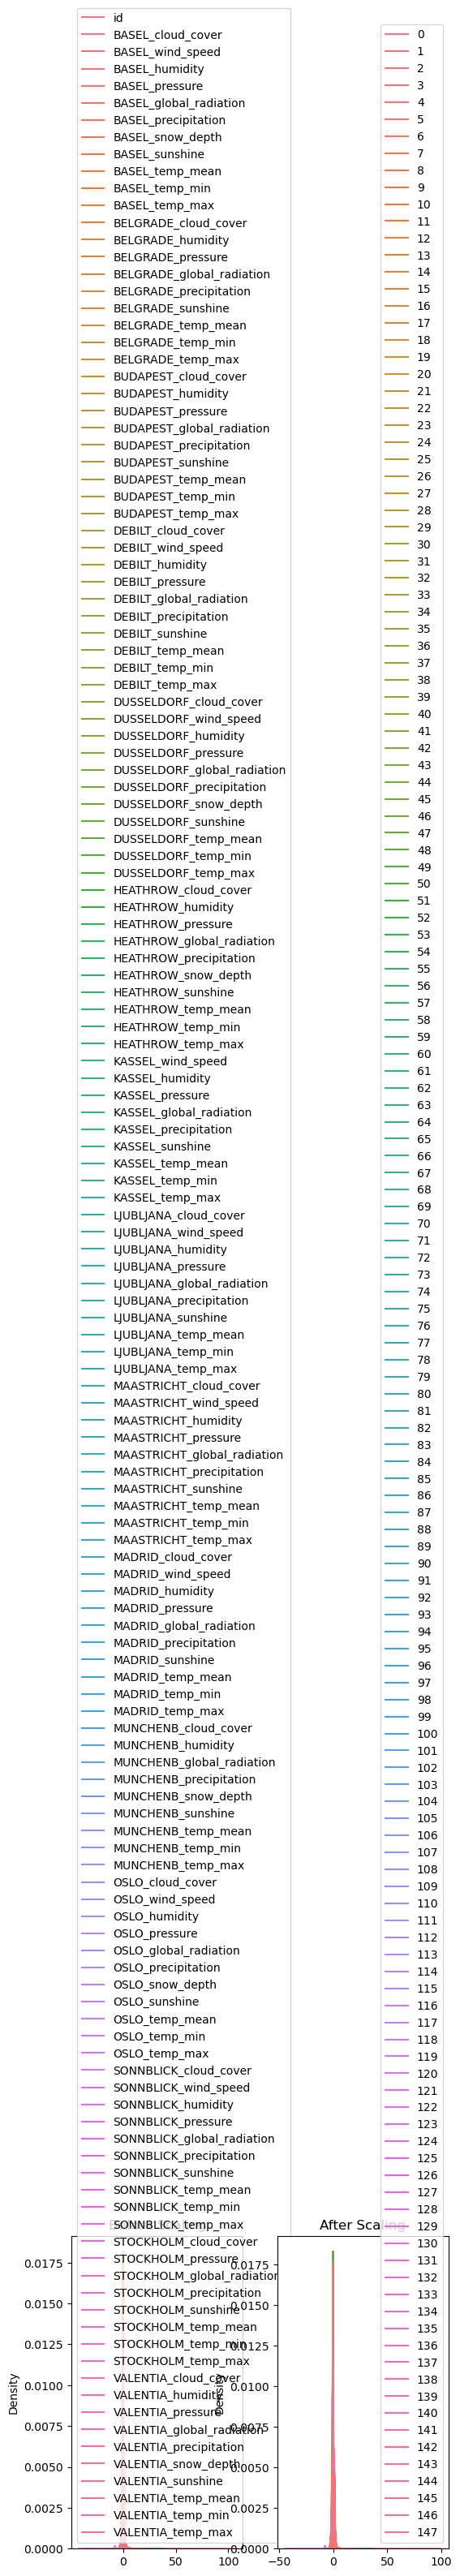

In [21]:
#Show scaling differences ##turn off legend
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train, ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_sc, ax=ax2)

plt.show()

In [86]:
#### SCENARIO 3 CODE
mlp = MLPClassifier(hidden_layer_sizes=(44, 60, 68), max_iter=5000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(44, 60, 68), max_iter=5000)

In [87]:
#testing ANN accuracy #ANN MODEL 3
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.808099000697188
0.6388985709306378


In [88]:
print(y_pred_test.shape)
print(y_test.shape)
print(y_pred.shape)
print(y_train.shape)

(5738, 15)
(5738, 15)
(17212, 15)
(17212, 15)


In [89]:
locations = list({x.split("_")[0] for x in activedf.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA',
 'id']

C:\Users\aminj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


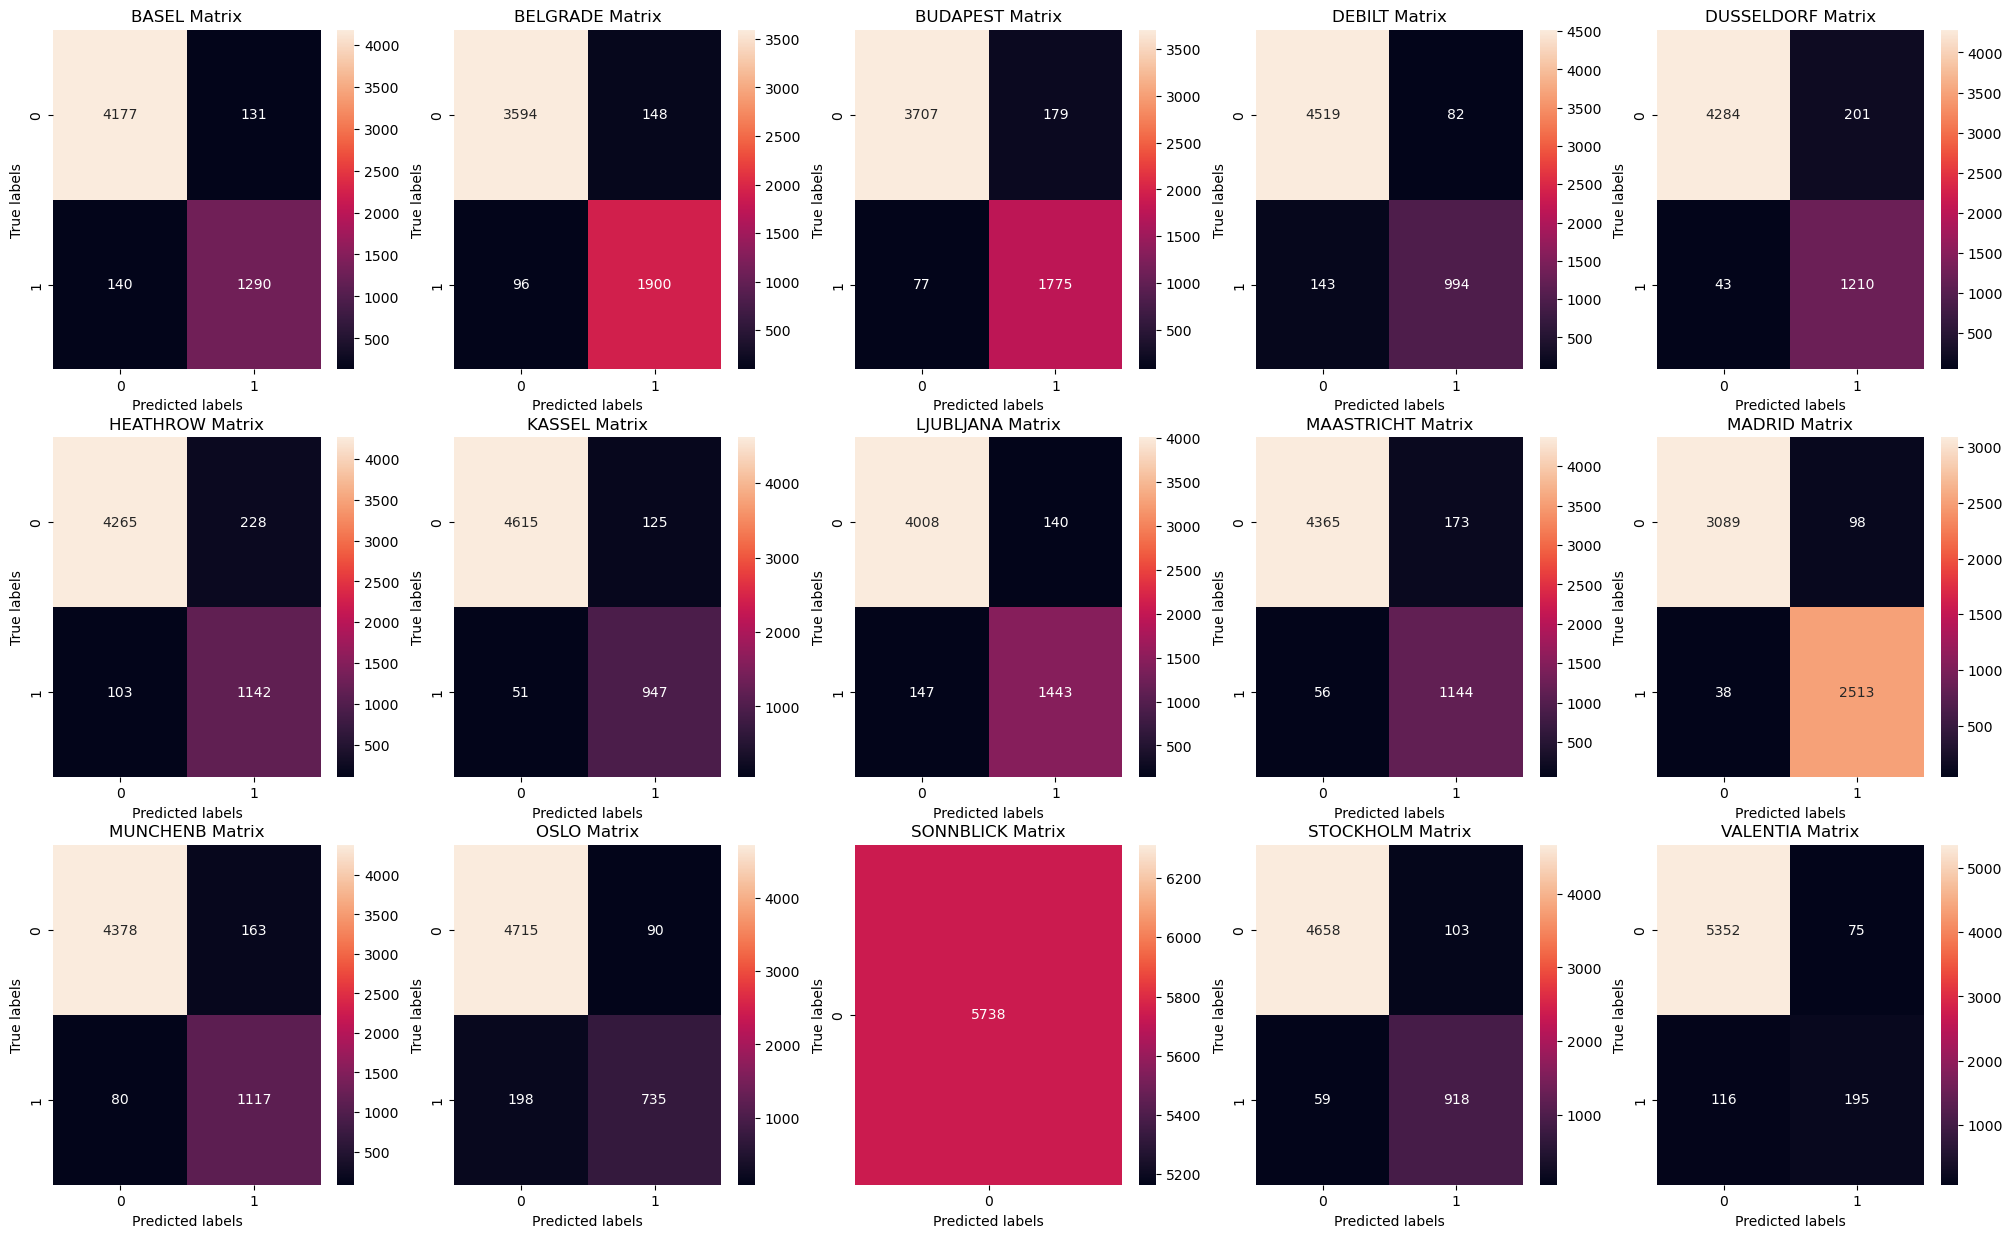

In [90]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

C:\Users\aminj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


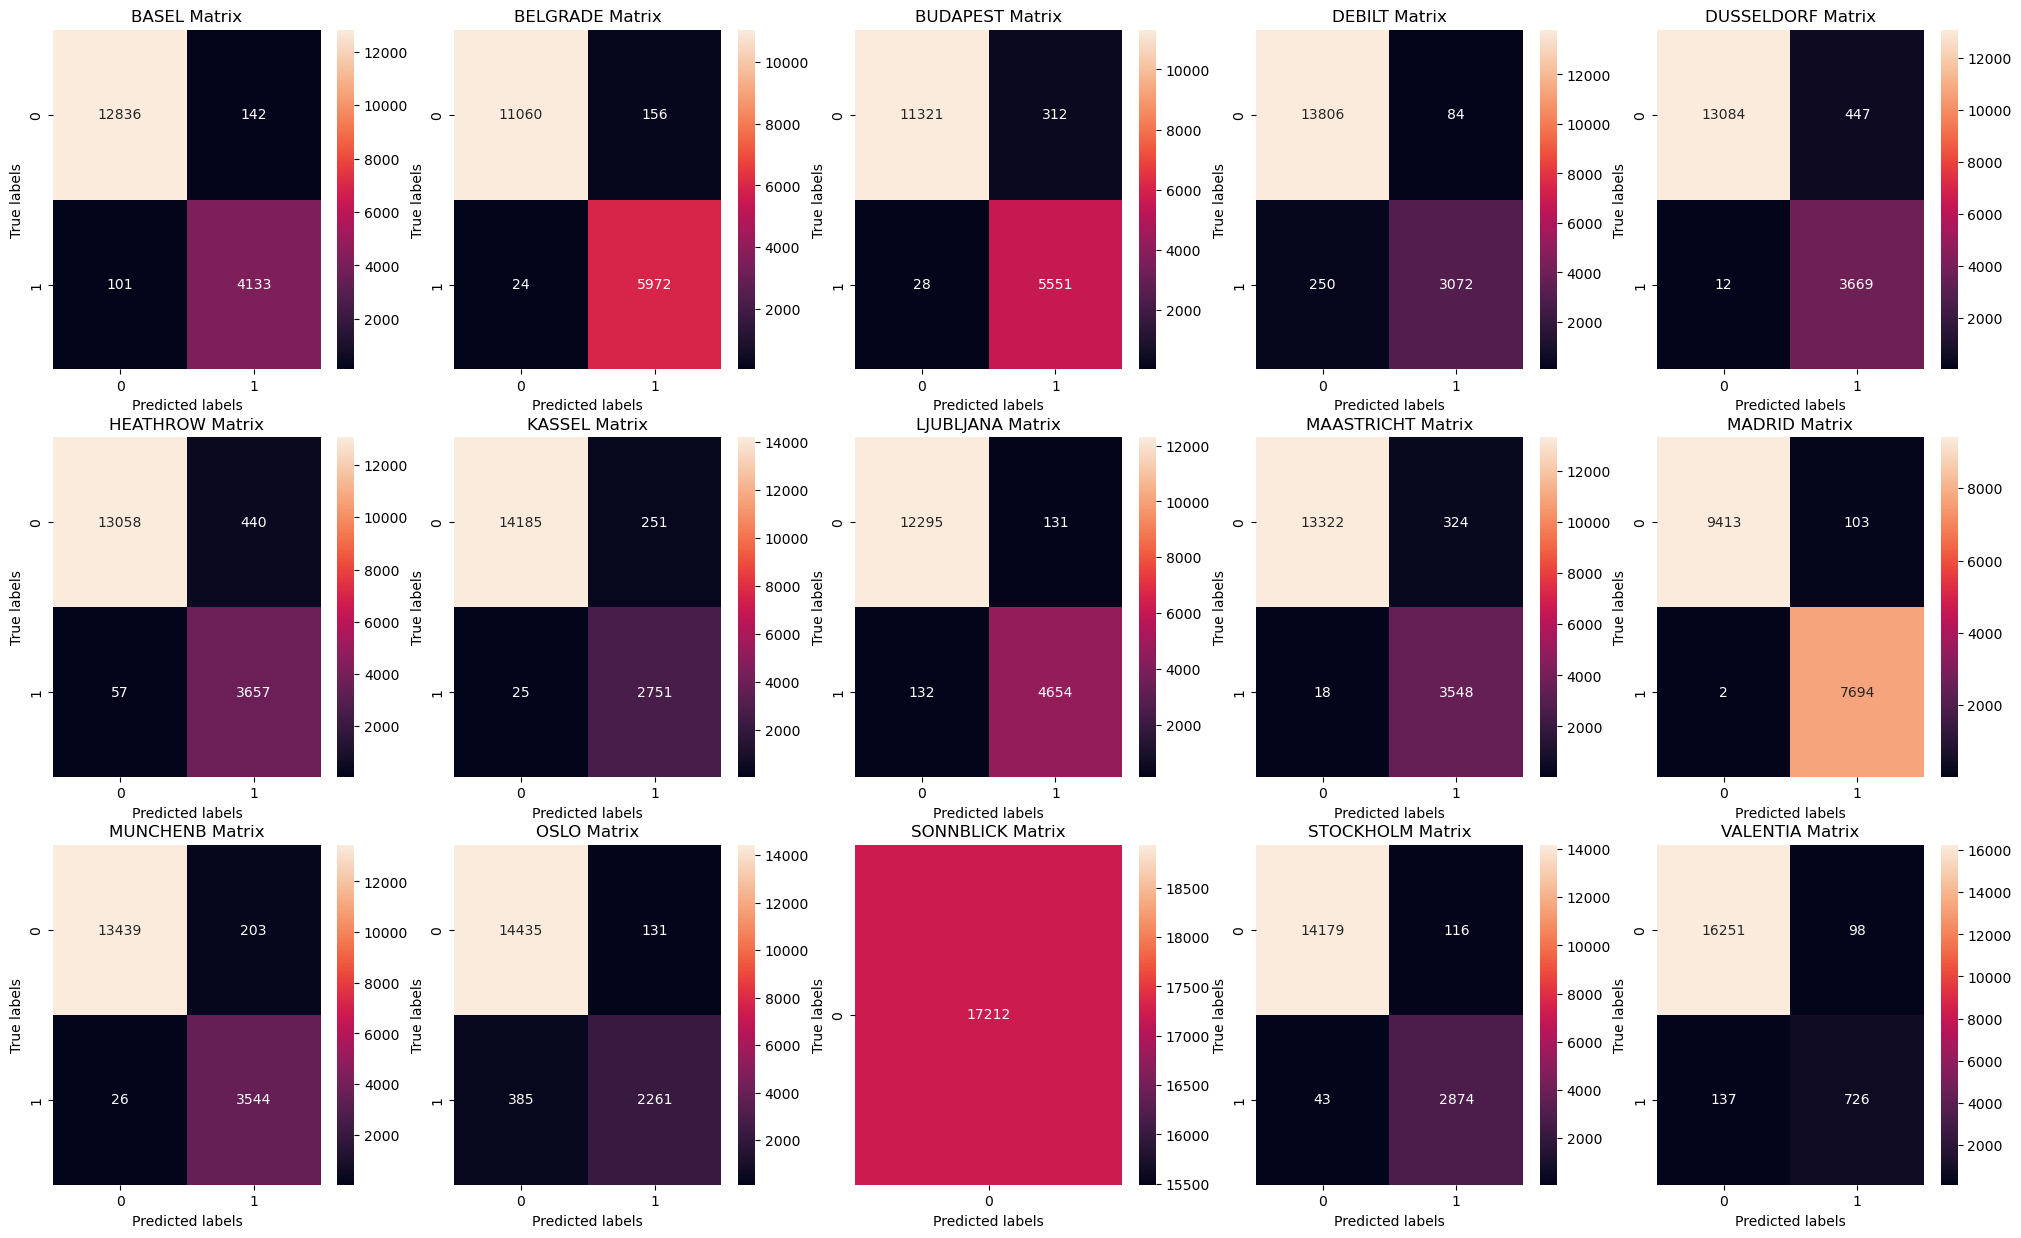

In [91]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

C:\Users\aminj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


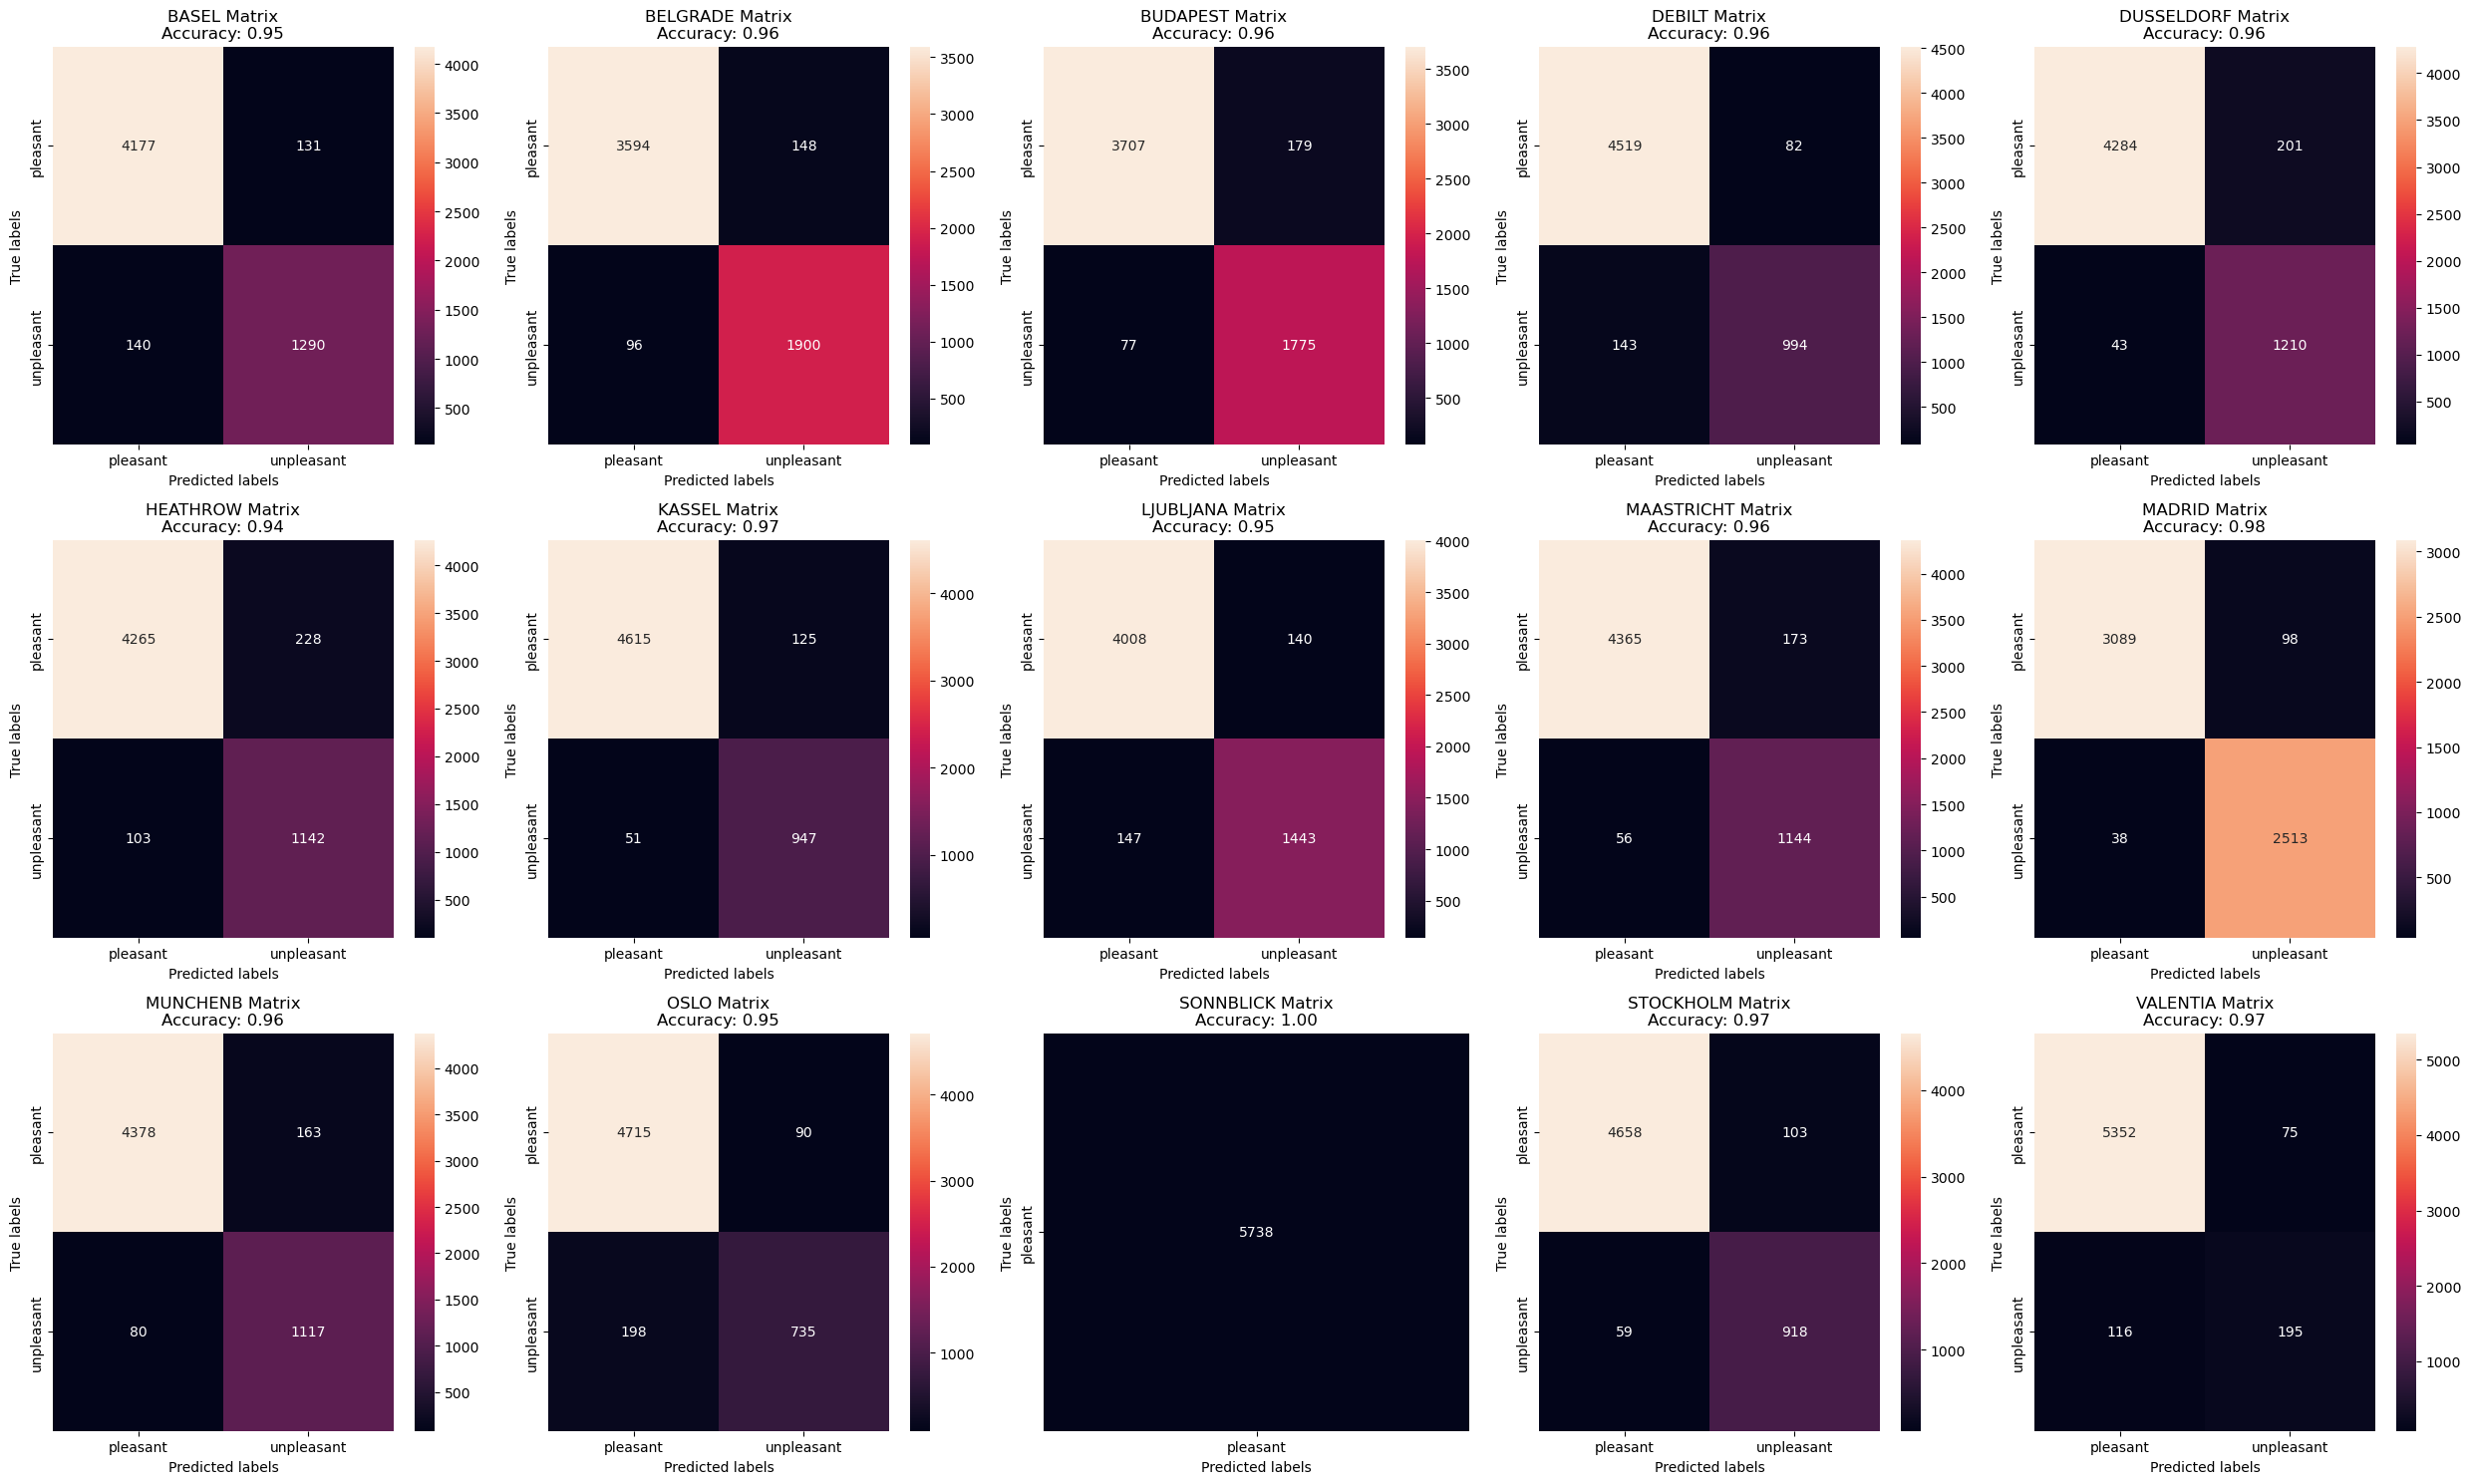

In [99]:
from sklearn.metrics import confusion_matrix

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count = 0
accuracies = []  # To store accuracy for each location

for i in range(3):
    for j in range(5):
        name = locations[count]
        y_true = y_test.loc[:,name+key]
        y_pred = y_pred_test[:,count]
        
        # Check for single-class cases and adjust
        unique_true = y_true.unique()
        unique_pred = np.unique(y_pred)
        all_classes = np.union1d(unique_true, unique_pred)  # Combine all seen classes

        # Create confusion matrix with all classes
        cm = confusion_matrix(y_true, y_pred, labels=all_classes)

        # Compute accuracy
        accuracy = cm.diagonal().sum() / cm.sum()
        accuracies.append(accuracy)
        
        # Display heatmap only if confusion matrix has more than one class
        if cm.shape[0] > 1:
            sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j])
        else:
            sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j], cbar=False)
        
        # Labels, title, and ticks
        ax[i,j].set_xlabel('Predicted labels')
        ax[i,j].set_ylabel('True labels')
        ax[i,j].set_title(f'{name} Matrix\nAccuracy: {accuracy:.2f}')
        ax[i,j].xaxis.set_ticklabels(labels[:len(all_classes)])  # Match available labels
        ax[i,j].yaxis.set_ticklabels(labels[:len(all_classes)])
        
        count += 1

plt.tight_layout()
plt.show()
